In [1]:
import os
import json
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

random.seed(1)

In [2]:
green = "\033[42;1m"
blue = "\033[44;1m"
red = "\033[41;1m"
yellow = "\033[43;1m"
right = "\033[0m"

In [3]:
def show_img(img_path):
    if os.path.exists(img_path): 
        img = imread(img_path)

        fig = plt.figure()
        fig.set_dpi(100)
        
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Results on the ScienceQA test set

In [4]:
split = "test"
label = "chameleon_chatgpt"

result_file = f"../../results/scienceqa/{label}_{split}_cache.jsonl"
data_root = "../../data/scienceqa"

pid_splits = json.load(open(os.path.join(data_root, "pid_splits.json")))
examples = json.load(open(os.path.join(data_root, "problems.json")))
ocrs = json.load(open(os.path.join(data_root, "ocrs.json")))

results = []
with open(result_file, 'r') as f:
    for line in f:
        try:
            data = json.loads(line)
            results.append(data)
        except:
            pass
        
random.shuffle(results)
# results
# results[0]

------------------------------------
[Pid]
20890

[Question_Text]
What is the Steller's jay's scientific name?

Context: The Steller's jay lives throughout North America. Georg Wilhelm Steller collected plant and animal specimens in Alaska. He identified the Steller's jay in 1741. The bird's scientific name refers to Georg Wilhelm Steller.

Options: (A) Cyanocitta stelleri (B) Cyanocitta cristata

[Metadata]
{'pid': '20890', 'has_image': True, 'grade': 4, 'subject': 'natural science', 'topic': 'biology', 'category': 'Scientific names', 'skill': 'Origins of scientific names'}

[Program]
['knowledge_retrieval', 'solution_generator', 'answer_generator']



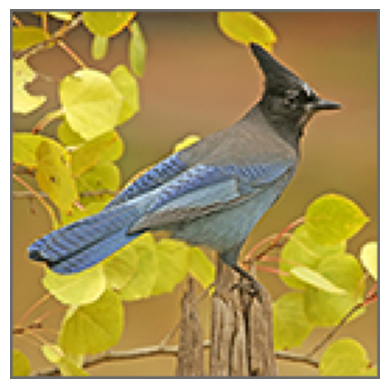

[Knowledge]
- Scientific names are used to identify and classify living organisms. 
- The scientific name of an organism consists of two parts: the genus name and the species name. 
- The genus name is capitalized and the species name is not. 
- The scientific name of an organism is often based on the name of the person who first described or discovered the organism.

[Solution]
The Steller's jay was identified by Georg Wilhelm Steller in 1741. The bird's scientific name refers to Georg Wilhelm Steller. 
The scientific name of an organism consists of two parts: the genus name and the species name. 
The genus name is capitalized and the species name is not. 
The scientific name of an organism is often based on the name of the person who first described or discovered the organism.
The Steller's jay's scientific name refers to Georg Wilhelm Steller.
Therefore, the answer is A, Cyanocitta stelleri.

[Answer]
Cyanocitta stelleri

[Prediction]
Cyanocitta stelleri



In [5]:
count = 0
num = 1 # number of results to show
for result in results:
    
    # data
    pid = result["pid"]
    data = examples[pid]
    
    question = data["question"]
    choices = data["choices"]
    answer = choices[data["answer"]]
    hint = data["hint"]
    lecture = data["lecture"]
    grade = int(data["grade"].replace("grade", ""))
    has_image = True if data["image"] else False
   

    # result
    pid = result["pid"]
    question_text = result["question_text"]
    true_false = result["true_false"]
    prediction = result["prediction"]
    modules = result["modules:output"]
    
    metadata = {"pid": pid,
            "has_image": has_image,
            "grade": grade,
            "subject": data["subject"],
            "topic": data["topic"],
            "category": data["category"],
            "skill": data["skill"]
    }
                
    if true_false and has_image :
        print("------------------------------------")
            
        print(f"{blue}[Pid]{right}\n{pid}\n")
        #print(f"{blue}[Question]{right}\n{question}\n")
        print(f"{blue}[Question_Text]{right}\n{question_text}\n")
        print(f"{blue}[Metadata]{right}\n{metadata}\n")
        print(f"{yellow}[Program]{right}\n{modules}\n")
            
        if data["image"]:
            image_path = f"../../data/scienceqa/images/{split}/{pid}/image.png"
            show_img(image_path)

        if "bing_search:output" in result:
            bing_search = result["bing_search:output"]
        else:
            bing_search = None

        if "knowledge_retrieval:output" in result:
            knowledge = result["knowledge_retrieval:output"]
        else:
            knowledge = None

        if "text_detector:output" in result:
            texts = result["text_detector:output"]
            texts = [(text[0][0], text[1]) for text in texts]
        else:
            texts = None

        if "image_captioner:output" in result:
            caption = result["image_captioner:output"]
        else:
            caption = None
            
        if "solution_generator:output" in result:
            solution = result["solution_generator:output"]
        else:
            solution = None

        if knowledge:
             print(f"{yellow}[Knowledge]{right}\n{knowledge}\n")

        if texts:
             print(f"{yellow}[Text]{right}\n{texts}\n")

        if bing_search:
             print(f"{yellow}[Bing Search]{right}\n{bing_search}\n")

        if caption:
             print(f"{yellow}[Caption]{right}\n{caption}\n")

        if solution:
             print(f"{yellow}[Solution]{right}\n{solution}\n")

        print(f"{green}[Answer]{right}\n{answer}\n")
        print(f"{red}[Prediction]{right}\n{prediction}\n")

        count += 1
        if count >= num:
            break